In [2]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')


Coefficients from SKLEARN: 
 [[1.97956055]]

Intercept from SKLEARN: 
 [0.48119311]

Coefficients from Gradient Descent Algorithm: 
 1.762255692770965

Intercept from Gradient Descent Algorithm: 
 0.4400785108908922


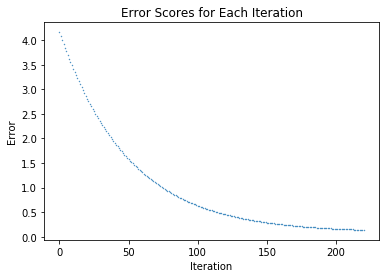

Error:           0.13880596307852752
Previous Error:  0.13979662407798496
Difference:      0.0009906609994574378
Iterations:      221


In [4]:
# Cost function for the linear regression that we will try to optimize
def LR_cost_function (alpha, beta, x, y):
    '''Return the cost for a given line and data
    
    Alpha and beta are the coefficients that describe the fit line, while 
    x and y are lists of arrays with the x and y value of each data point'''
    
    error = 0
    n = len(x)
    for i in range(n):
        point_error = (y[i] - (alpha + beta * x[i])) ** 2
        error += point_error
    return error / n


# Function we will call each iteration of the gradient algorithm
def step (alpha_cur, beta_cur, learning_rate, x, y):
    '''Move downhill from a current cost function to a new, more optimal one'''
    alpha = 0
    beta = 0
    n = len(x)
    for i in range(n):
        # Partial derivative of the intercept
        point_alpha = -(2 / n) * (y[i] - ((alpha_cur + beta_cur * x[i])))
        alpha += point_alpha
        
        # Partial derivative of the slope
        point_beta = -(2 / n) * x[i] * (y[i] - ((alpha_cur + beta_cur * x[i])))
        beta += point_beta
        
    new_alpha = alpha_cur - learning_rate * alpha
    new_beta = beta_cur - learning_rate * beta
    return [new_alpha, new_beta]

# These constants correspond to the decision points described above

# How many steps to take
stop = 1000

# How far to move with each step
learning_rate = 0.005

# Starting values for intercept and slope
alpha_start = 0
beta_start = 0

# Generate random data
x = np.random.normal(0, 1, 100)
y = x * 2 + np.random.sample(100)

# Fit a true minimum regression using solved equations
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

print('\nCoefficients from SKLEARN: \n', regr.coef_)
print('\nIntercept from SKLEARN: \n', regr.intercept_)

# Now fit an iteravely optimized regression using your custom 
# Gradient Descent algorithm

# Store each iteration for later inspection
all_error = []
last_error = 1
error_dif = 1

# Provide starting values
alpha = alpha_start
beta = beta_start

# Run the algorithm
for iter in range(stop):
    # Take a step, assigning the results of our step function to feed into
    # the next step.
    alpha, beta = step(alpha, beta, learning_rate, x, y)
    
    # Calculate the error
    error = LR_cost_function(alpha, beta, x, y)
        
    # Store the error to inspect later
    all_error.append(error)
    
    # Add a stopping threshold
    if len(all_error) > 1:
        last_error = all_error[-2]
        error_dif = error - last_error

    if abs(error_dif) <= .001:
        break


print('\nCoefficients from Gradient Descent Algorithm: \n', beta)
print('\nIntercept from Gradient Descent Algorithm: \n', alpha)

plt.plot(all_error, 'o', ms = 0.4)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Scores for Each Iteration')
plt.show()

print("Error:          ", error)
print("Previous Error: ", last_error)
print("Difference:     ", abs(error_dif))
print("Iterations:     ", len(all_error))